BENIGN       168186
MALICIOUS     19429
Name: Label, dtype: int64

Rapport de Classification pour Classificateur de Bayes:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13     25229
           1       0.11      1.00      0.20      2914

    accuracy                           0.17     28143
   macro avg       0.56      0.53      0.16     28143
weighted avg       0.91      0.17      0.14     28143

Accuracy: 0.16579611271008776
Precision: 0.9078901850038723
Recall: 0.16579611271008776
F1-score: 0.13701409940401224


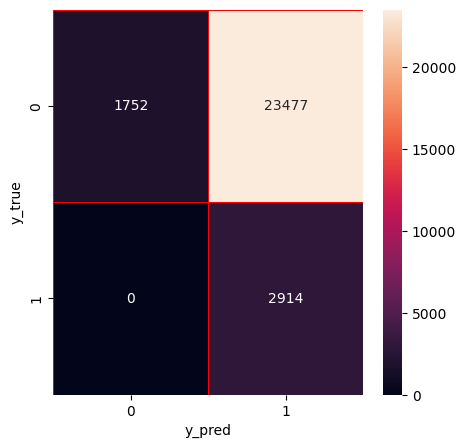


Rapport de Classification pour Arbre de décision:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     25229
           1       0.93      0.89      0.91      2914

    accuracy                           0.98     28143
   macro avg       0.96      0.94      0.95     28143
weighted avg       0.98      0.98      0.98     28143

Accuracy: 0.9810965426571439
Precision: 0.9808286474537248
Recall: 0.9810965426571439
F1-score: 0.9809112263613521


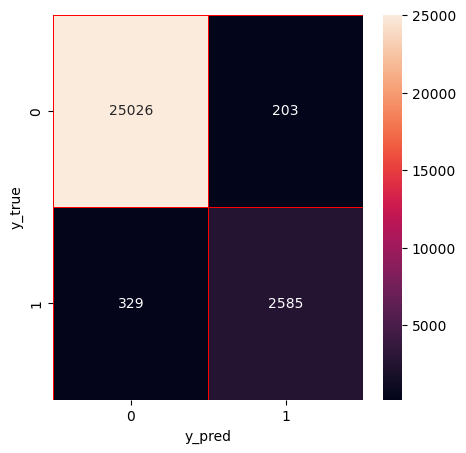

In [29]:
%pip install seaborn
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


df = pd.read_csv('./data/dataset.csv', delimiter=',')

numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

print(df.Label.value_counts())

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1:])
x_data = df.drop(['Label'],axis=1).values.astype('int')
y_data = df.iloc[:, -1].values.reshape(-1,1)
y_data=np.ravel(y_data).astype('int')
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 0.85, test_size = 0.15, random_state = 0,stratify = y_data)

# Classificateur de Bayes
bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)
bayes_predictions = bayes_model.predict(X_test)

# Arbre de décision
tree_model = DecisionTreeClassifier(random_state = 0)
tree_model.fit(X_train,y_train)
tree_predictions=tree_model.predict(X_test)

models = {
    'Classificateur de Bayes': bayes_predictions,
    'Arbre de décision': tree_predictions
}

#Affichage de toutes les données
for name, predictions in models.items():
    precision,recall,fscore,none= precision_recall_fscore_support(y_test, predictions, average='weighted') 
    print(f"\nRapport de Classification pour {name}:")
    print(classification_report(y_test, predictions))
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", fscore)
    cm=confusion_matrix(y_test,predictions)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()